In [1]:
from openml import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
house_prices_dataset_id = 42165

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
house_prices_dataset = datasets.get_dataset(house_prices_dataset_id)
X, y, _, _ = house_prices_dataset.get_data(target=house_prices_dataset.default_target_attribute)

In [5]:
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y,columns=[house_prices_dataset.default_target_attribute])], axis=1)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


# EDA

Missing Values Analysis

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   uint8  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   uint8  
 18  OverallC

In [9]:
nan_value_columns = []
nan_values = []
for col in df.columns:
    number = df[col].isnull().sum()
    if number>1:
        nan_value_columns.append(col)
        nan_values.append(number)

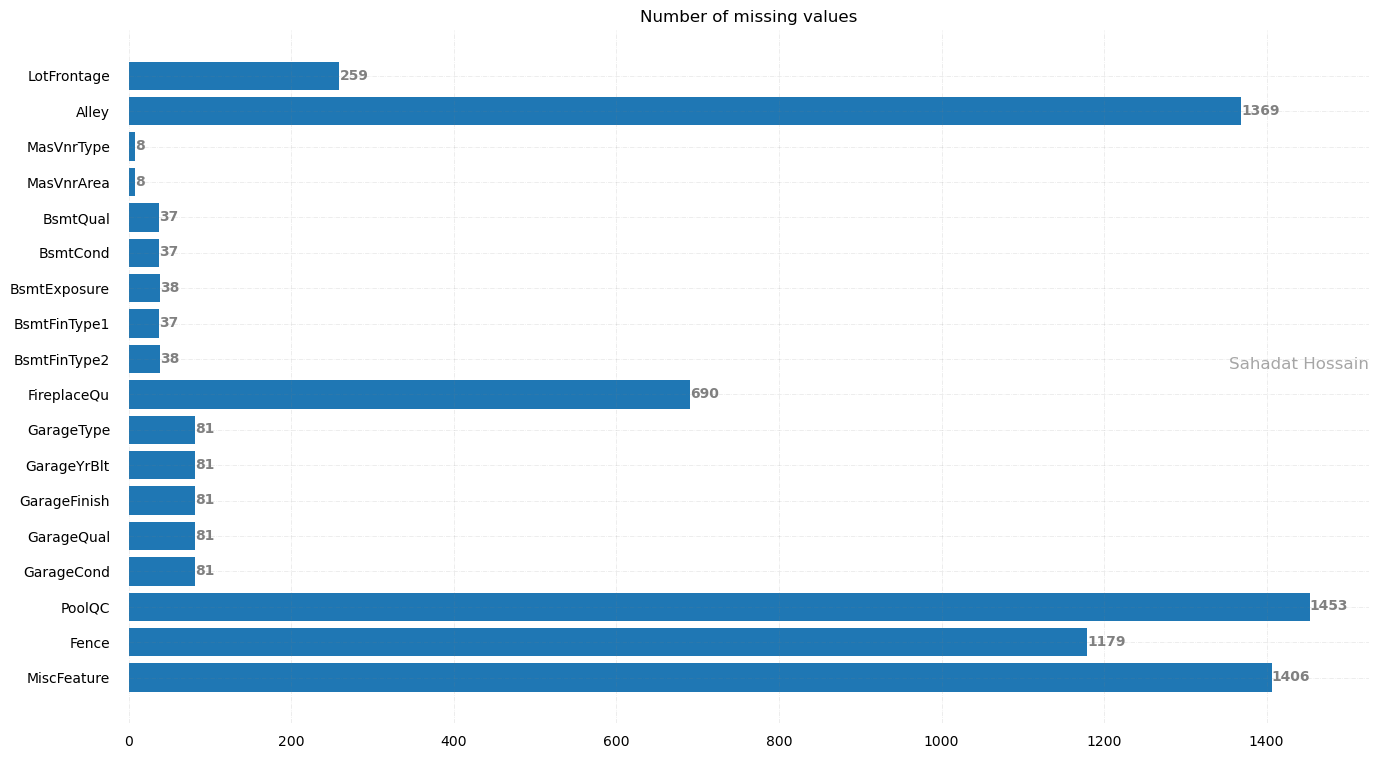

In [10]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(nan_value_columns, nan_values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y axis ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Number of missing values')
 
# Add Text watermark
fig.text(0.9, 0.5, 'Sahadat Hossain', fontsize = 12,color ='grey', ha ='right', va ='bottom',alpha = 0.7)
 
# Show Plot
plt.show()

Breaking into numerical and categorical features

In [11]:
numerical_feat = [feat for feat in df.columns if df[feat].dtype != 'O']
categorical_feat = [feat for feat in df.columns if df[feat].dtype == 'O']

In [12]:
df[numerical_feat].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
df[categorical_feat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


Date/Year Features 

In [14]:
year_feat = [y for y in numerical_feat if 'Year' in y or 'Yr' in y]
df[year_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


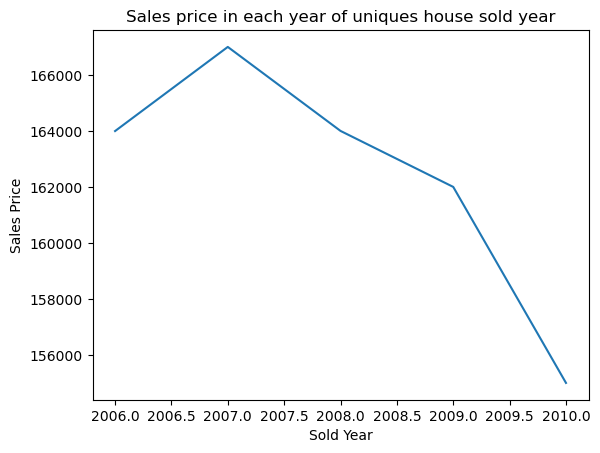

In [15]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sold Year')
plt.ylabel('Sales Price')
plt.title('Sales price in each year of uniques house sold year')
plt.show()

With increasing year the sales price has dipped!!!!
We need more analysis with respect to other params

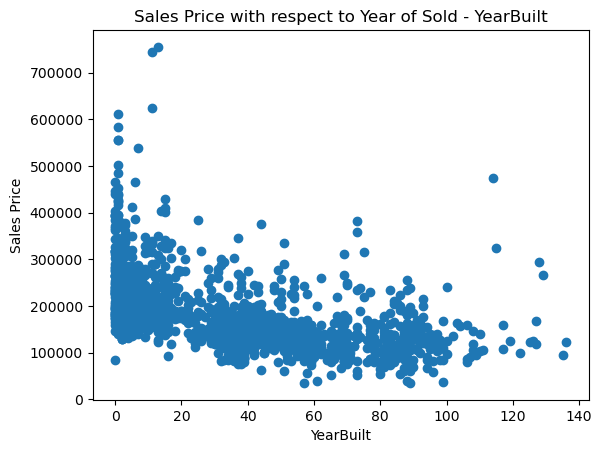

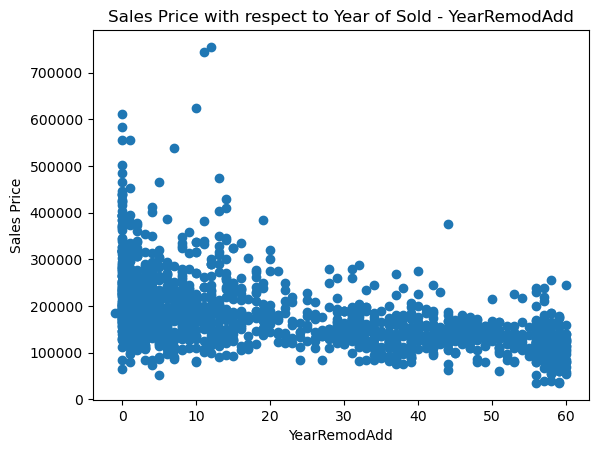

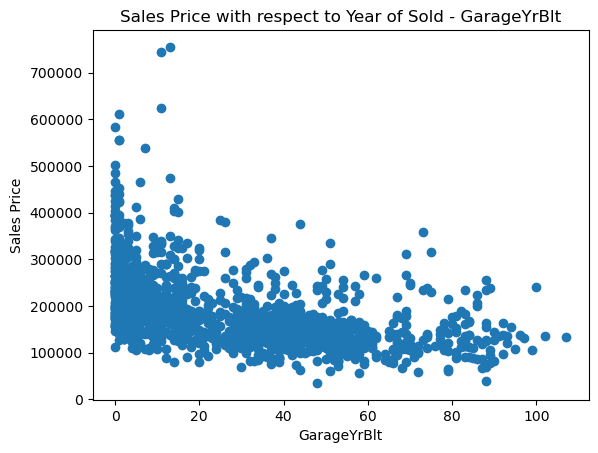

In [16]:
for yr in year_feat:
    data = df.copy()
    if yr != 'YrSold':
        data[yr] = data['YrSold']-data[yr]
        plt.scatter(data[yr],data['SalePrice'])
        plt.xlabel(yr)
        plt.ylabel('Sales Price')
        plt.title(f'Sales Price with respect to Year of Sold - {yr}')
        plt.show()
        

We can see that with respect to the houses newly built or new features recently build has higher sales prices than the old houses

Now let's break our numerical features into discrete and continuous features and check their relationship with salesprice

In [17]:
discrete_feat = [d for d in numerical_feat if len(df[d].unique())<25 and d not in year_feat]
continuous_feat = [c for c in numerical_feat if c not in discrete_feat and c not in year_feat and c!='Id']

In [18]:
df[discrete_feat].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [19]:
df[continuous_feat].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


Now let's check the relationship between discrete numerical features and sales price

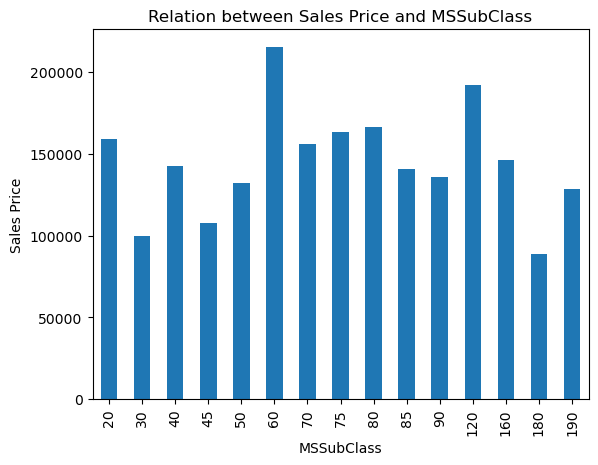

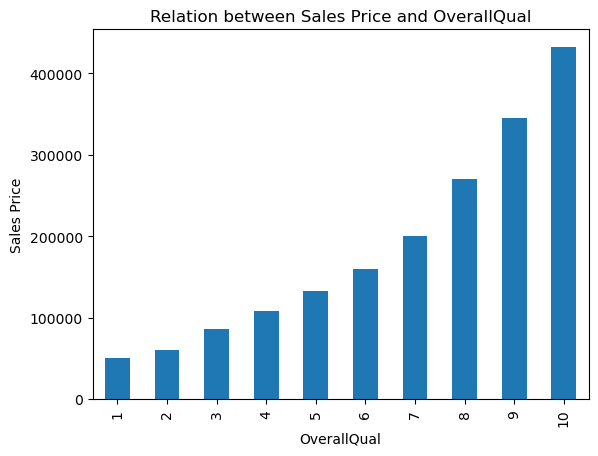

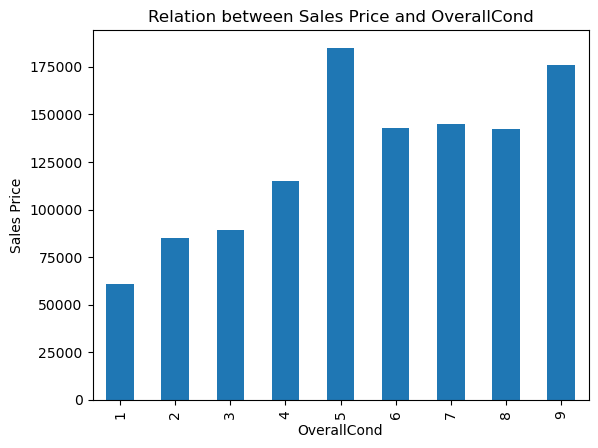

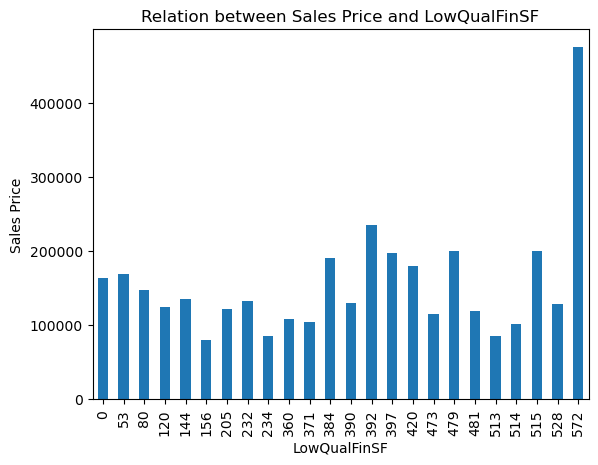

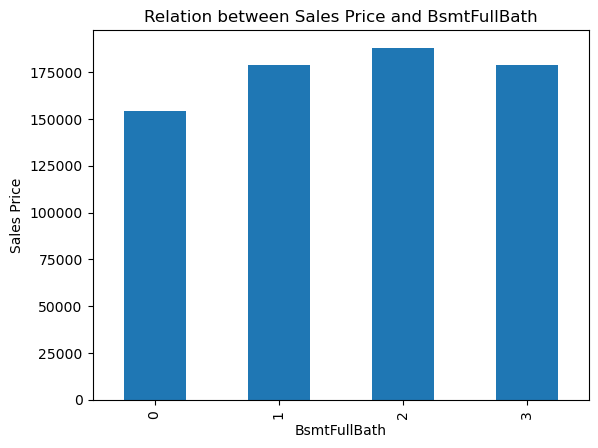

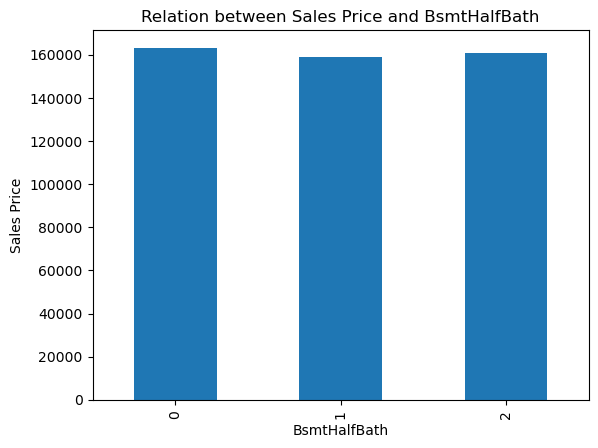

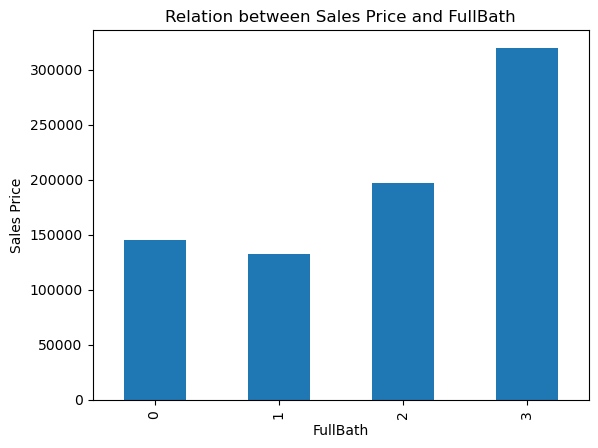

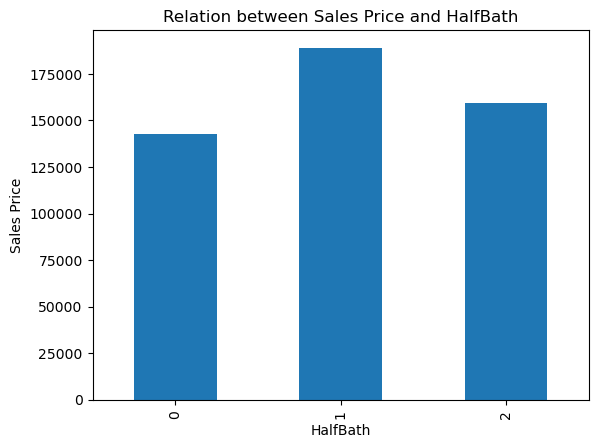

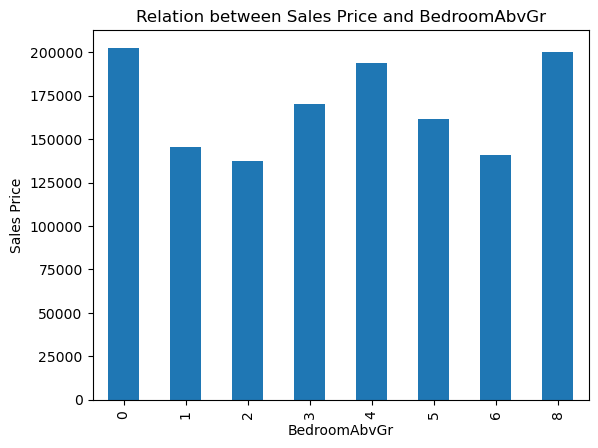

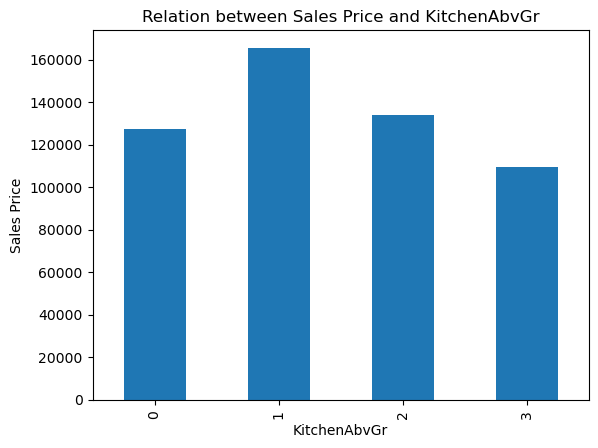

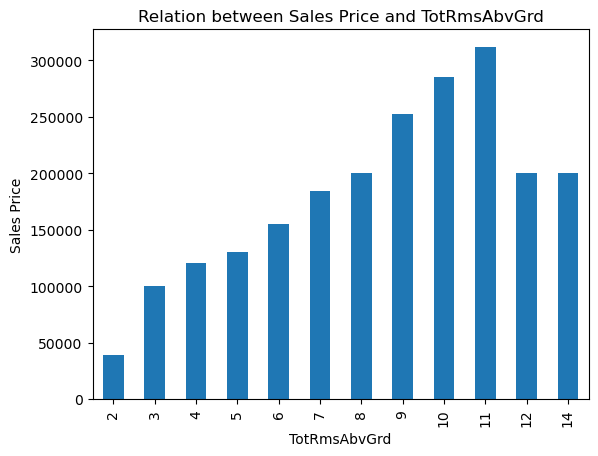

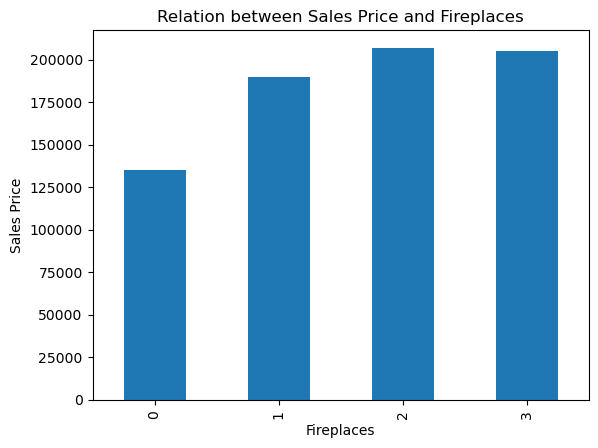

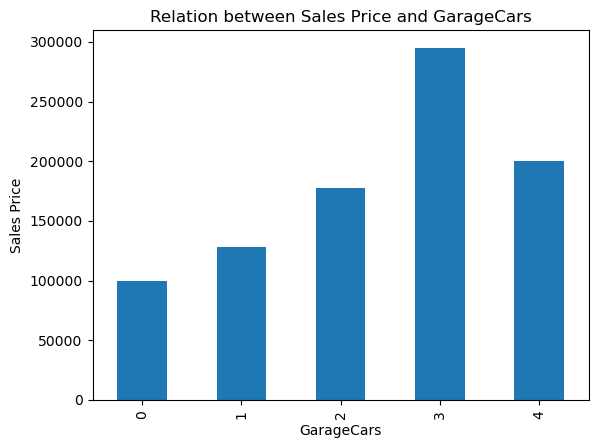

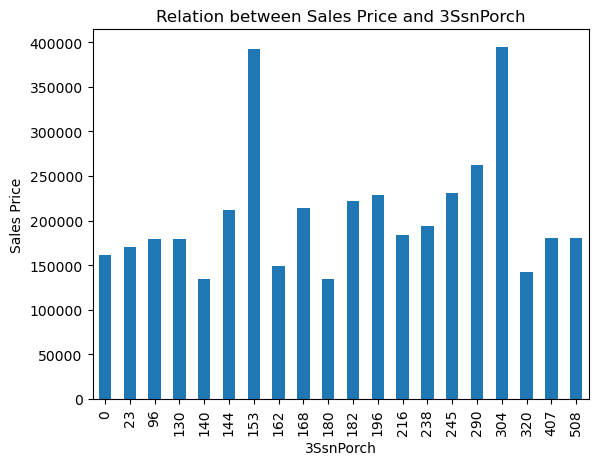

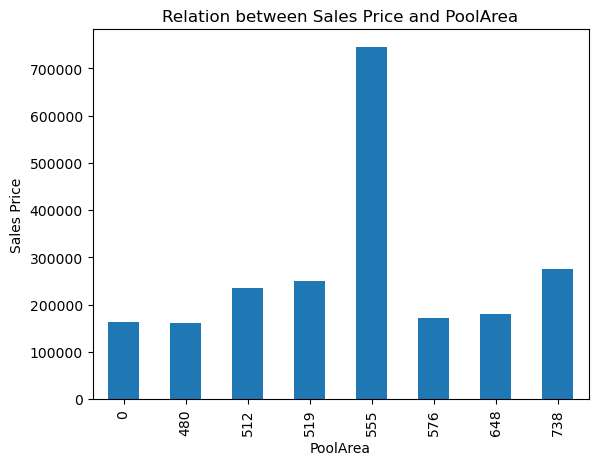

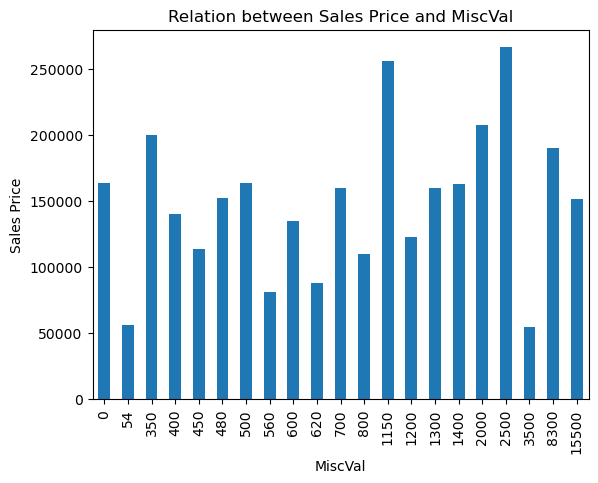

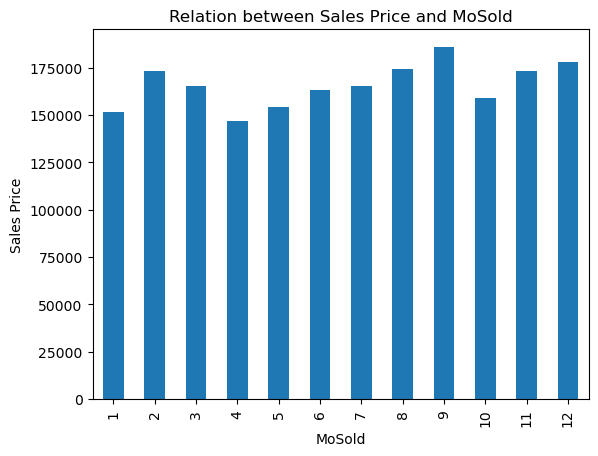

In [20]:
data = df.copy()
for d in discrete_feat:
    data.groupby(d)['SalePrice'].median().plot.bar()
    plt.xlabel(d)
    plt.ylabel('Sales Price')
    plt.title(f'Relation between Sales Price and {d}')
    plt.show()
    

Let's check relationship between continuous numerical values and sales price

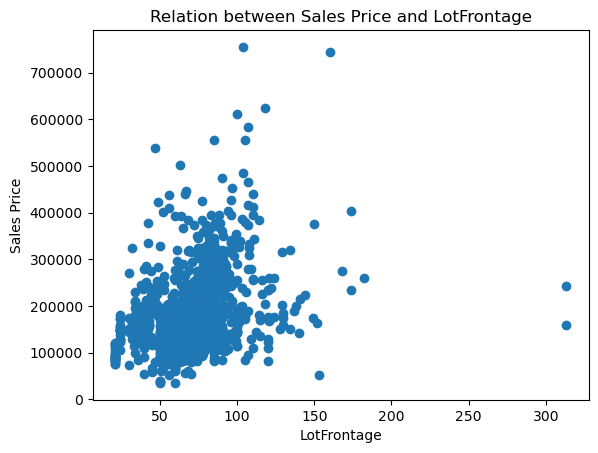

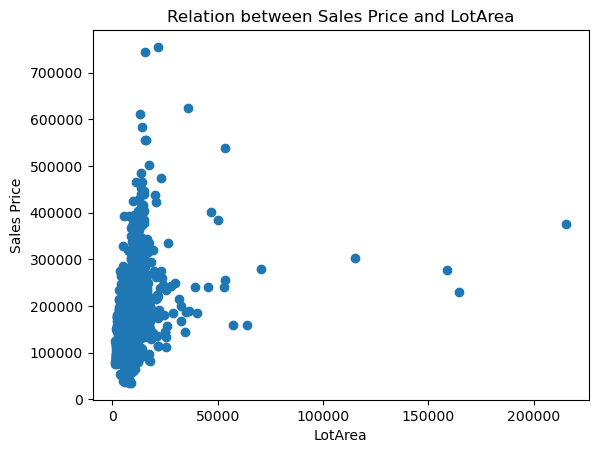

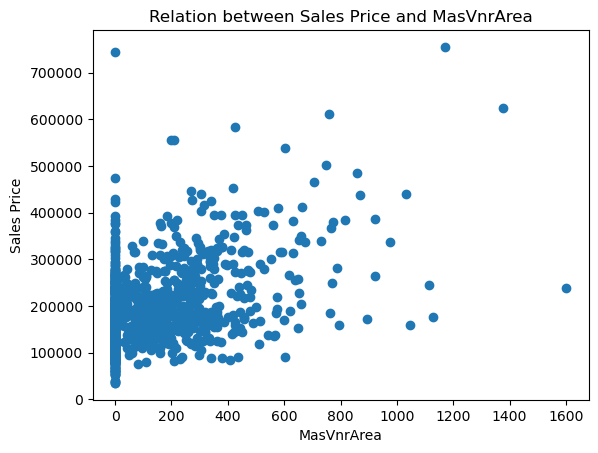

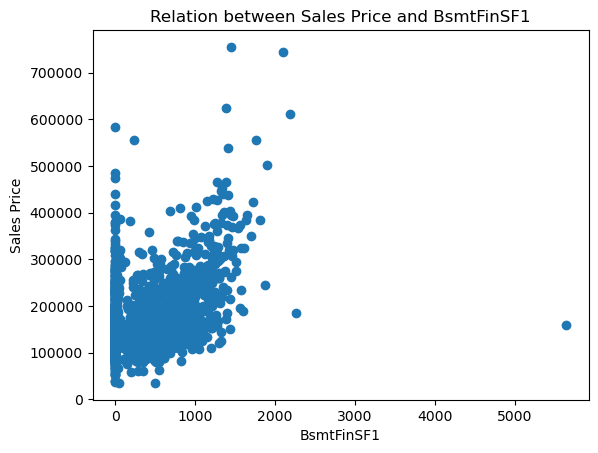

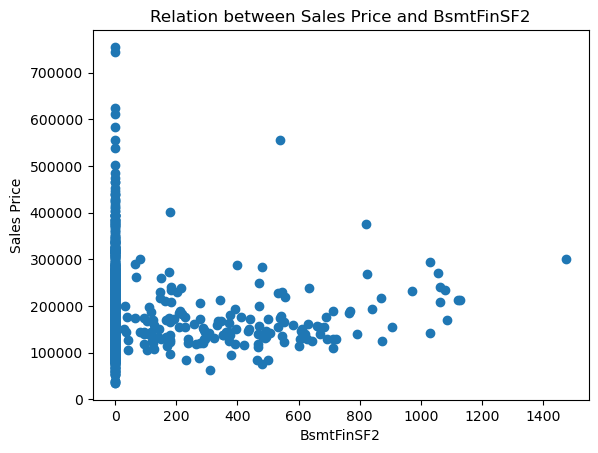

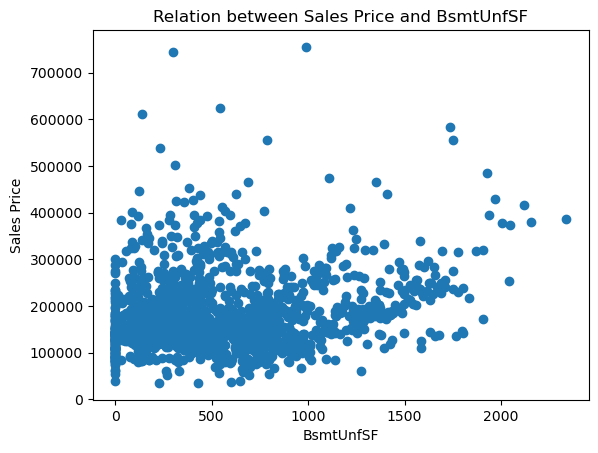

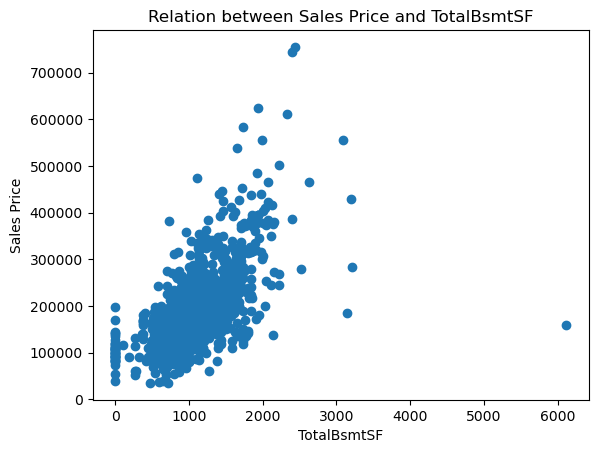

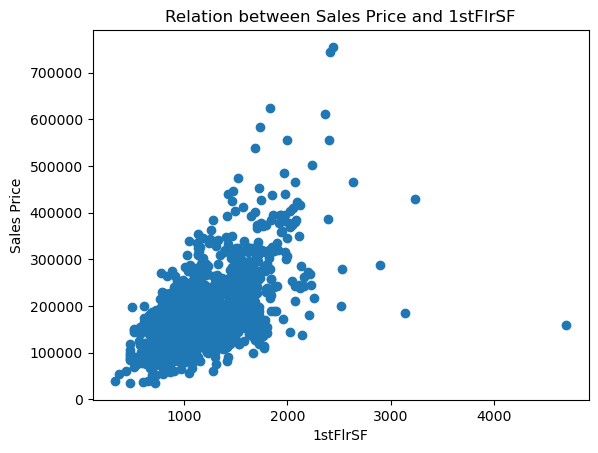

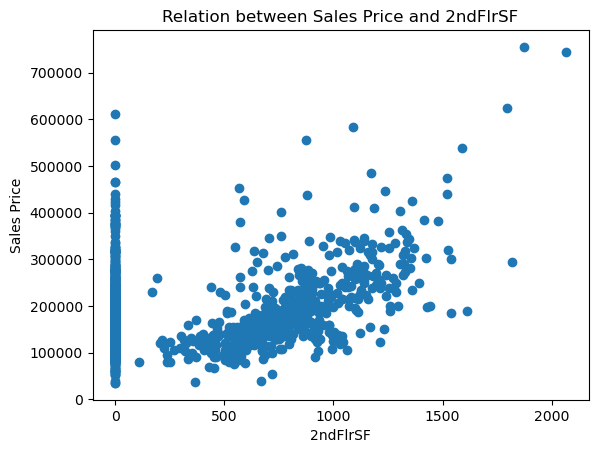

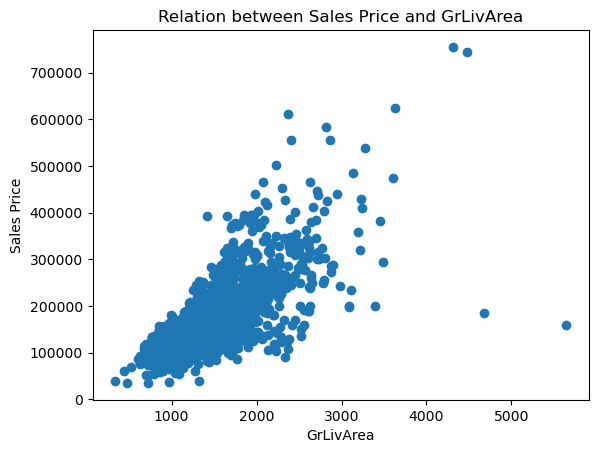

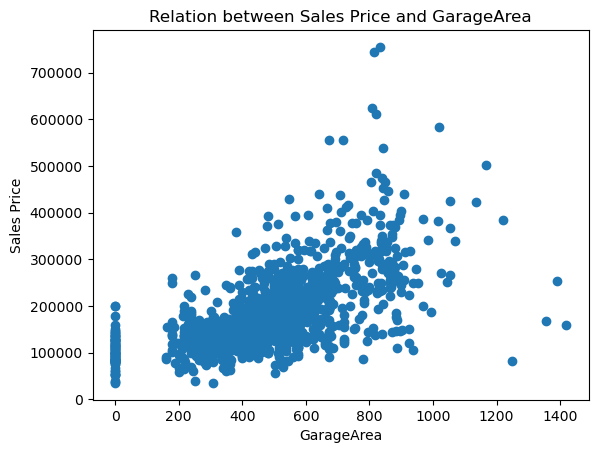

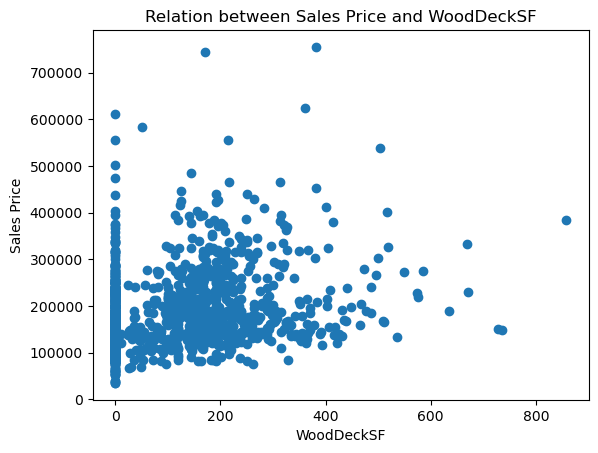

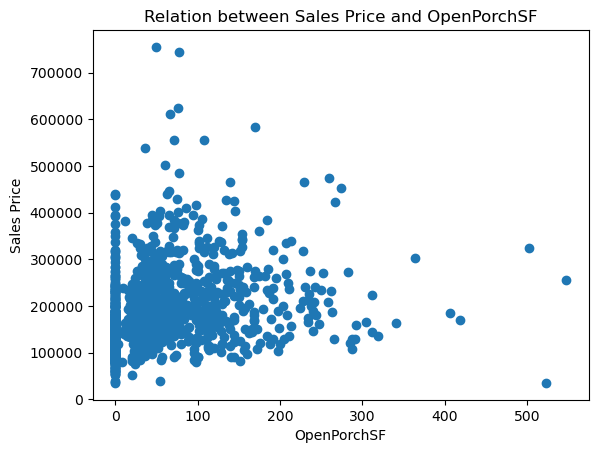

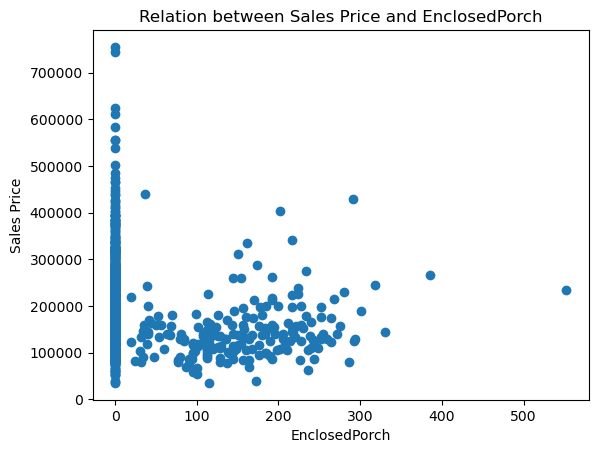

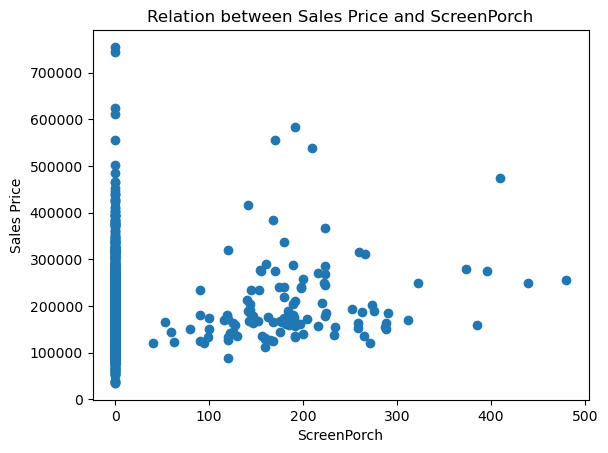

In [21]:
data = df.copy()
for d in continuous_feat:
    if d!='SalePrice':
        plt.scatter(data[d],data['SalePrice'])
        plt.xlabel(d)
        plt.ylabel('Sales Price')
        plt.title(f'Relation between Sales Price and {d}')
        plt.show()
    

# Linear Regression Class

In [8]:
class LinearRegression:
    def __init__(self,epochs,alpha):
        self.epochs = epochs
        self.alpha = alpha     # alpha is the learning rate
    
    # fit method
    def fit(self,X,y):
        # m = no of observations
        # n = no of features
        self.m,self.n = X.shape
        # y = wx + b
        # b = intecept
        # w = co efficients
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        # gradient descent
        for i in range(self.epochs):
            self.update_weights()
        return self
    
    # gradient decsent to find global minima
    def update_weights(self):
        y_hat = self.predict(self.X)
        # calculate gradients
        dw = -(2*(self.X.T).dot(self.y-y_hat))/self.m
        db = -(2*np.sum(self.y-y_hat))/self.m
        # update weights
        self.w = self.w - self.alpha*dw
        self.b = self.b - self.alpha*db
        return self
    
    # predict method
    def predict(self,X):
        return X.dot(self.w)+self.b

# Simple Linear Regression with Neighborhood feature only

In [9]:
neighbor = df['Neighborhood']
neighbor.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [10]:
X = neighbor.values
y = df.iloc[:,-1].values

In [11]:
print(X)
print(X.shape)

['CollgCr' 'Veenker' 'CollgCr' ... 'Crawfor' 'NAmes' 'Edwards']
(1460,)


In [12]:
X=X.reshape((1460,1))
print(X.shape)
print(X)

(1460, 1)
[['CollgCr']
 ['Veenker']
 ['CollgCr']
 ...
 ['Crawfor']
 ['NAmes']
 ['Edwards']]


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X).toarray()

In [14]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
model =LinearRegression(epochs=1500,alpha=0.02)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [17]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[213618.41261649 200624.        ]
 [146983.8467319  133000.        ]
 [131684.73258978 110000.        ]
 [204542.87379724 192000.        ]
 [143437.46076827  88000.        ]
 [129757.41123064  85000.        ]
 [227829.18789402 282922.        ]
 [114781.37102395 141000.        ]
 [309287.58298465 745000.        ]
 [227829.18789402 148800.        ]
 [227829.18789402 208900.        ]
 [192384.80424958 136905.        ]
 [191410.91684583 225000.        ]
 [146983.8467319  123000.        ]
 [146983.8467319  119200.        ]
 [146983.8467319  145000.        ]
 [309287.58298465 190000.        ]
 [203254.43995142 123600.        ]
 [138417.02318618 149350.        ]
 [129757.41123064 155000.        ]
 [146983.8467319  166000.        ]
 [203254.43995142 144500.        ]
 [114781.37102395 110000.        ]
 [191410.91684583 174000.        ]
 [192384.80424958 185000.        ]
 [129757.41123064 168000.        ]
 [227829.18789402 177500.        ]
 [141371.48230571  84500.        ]
 [126124.35591522 32

In [18]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(error)
print(rmse)

58188.05528258306
